# Loading the data

In [1]:
import pandas as pd
df = pd.read_csv('weatherDef.csv')

In [2]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Naïve Bayes without preprocessing

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [4]:
from sklearn.naive_bayes import GaussianNB
gnbNormal = GaussianNB().fit(X_train, y_train)

In [5]:
from sklearn.metrics import classification_report
print(classification_report(gnbNormal.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72      2563
           1       0.65      0.83      0.73      2072

    accuracy                           0.72      4635
   macro avg       0.74      0.73      0.72      4635
weighted avg       0.75      0.72      0.72      4635



              precision    recall  f1-score   support

           0       0.82      0.64      0.72      2563
           1       0.65      0.83      0.73      2072

    accuracy                           0.72      4635
   macro avg       0.74      0.73      0.72      4635
weighted avg       0.75      0.72      0.72      4635



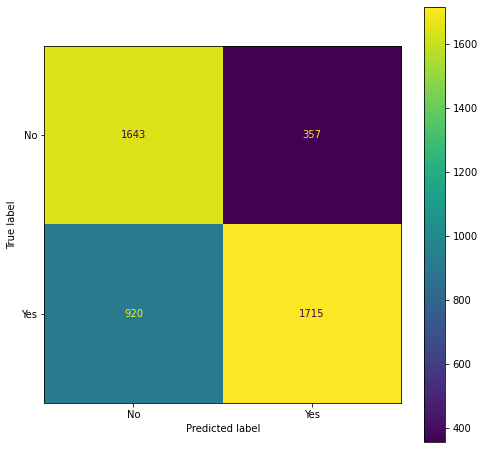

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
gnbNormal = GaussianNB().fit(X_train, y_train)
print(classification_report(gnbNormal.predict(X_test), y_test))

plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(gnbNormal, X_test, y_test, display_labels=['No', 'Yes'], ax = plt.subplot())

C:\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


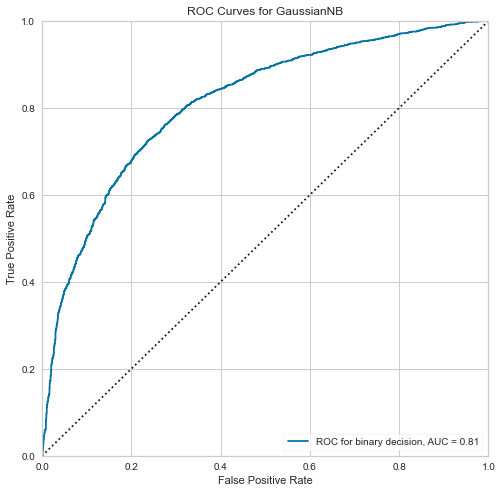

In [7]:
from yellowbrick.classifier.rocauc import roc_auc

plt.figure(figsize=(8,8));
roc_auc(gnbNormal, X_train, y_train, X_test, y_test, binary=True, classes=['No', 'Yes']);

# Preprocessing for Naïve Bayes

We can do some preprocessing on Naïve Bayes to improve the accuracy of the model such as:

    - Delete correlated variables
    - Use log probabilities
    - Delete 0 probabilities

## Deleting correlated variables

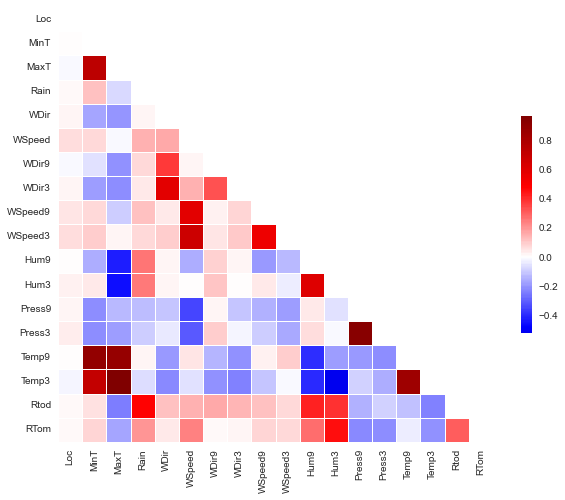

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [9]:
corrCoef = 0.9
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corrCoef)]
print()
print(to_drop)


['Press3', 'Temp3']


C:\Users\pable\AppData\Local\Temp\ipykernel_10120\2743523.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [10]:
num1 = df.drop(columns=to_drop)
num1

,Loc,MinT,MaxT,Rain,WDir,WSpeed,WDir9,WDir3,WSpeed9,WSpeed3,Hum9,Hum3,Press9,Temp9,Rtod,RTom
0,0,10.0,26.2,0.0,14,37,0,14,4,20,67,25,1013.8,17.1,0,0
1,0,14.3,21.6,19.2,15,50,14,15,9,28,98,44,1011.8,14.5,1,0
2,0,0.2,13.6,0.0,14,30,2,13,7,19,100,50,1022.9,4.0,0,0
3,0,17.5,30.0,1.0,12,43,0,13,6,30,75,35,1005.4,22.2,0,0
4,0,15.2,26.3,0.0,13,43,15,13,20,26,54,24,1010.9,19.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23167,46,8.0,15.2,2.4,15,39,14,15,11,22,85,64,1020.0,11.2,1,1
23168,46,7.0,20.1,0.0,15,46,5,13,19,15,65,94,1019.9,14.8,0,1
23169,46,9.8,17.3,0.0,5,52,5,5,20,15,81,65,1017.8,13.8,0,1
23170,46,3.6,15.1,0.6,3,37,4,7,6,13,96,54,1019.6,7.3,0,1


In [11]:
Xnum1 = num1[num1.columns[:-1]]
ynum1 = num1[num1.columns[-1]]

# Gaussian Naïve Bayes

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Xnum1, ynum1, test_size=0.2, random_state=0, stratify = ynum1)

              precision    recall  f1-score   support

           0       0.82      0.63      0.72      2606
           1       0.64      0.83      0.72      2029

    accuracy                           0.72      4635
   macro avg       0.73      0.73      0.72      4635
weighted avg       0.74      0.72      0.72      4635



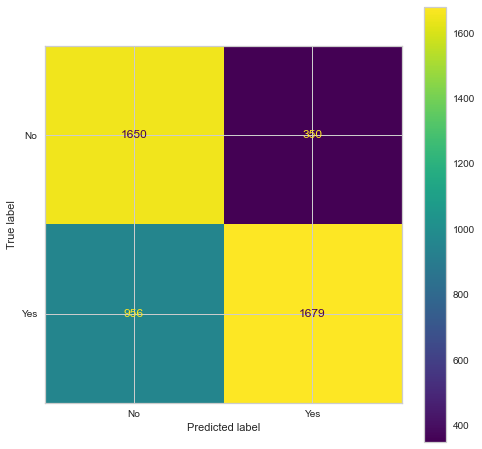

In [18]:
from sklearn.naive_bayes import GaussianNB
gnbNormal = GaussianNB().fit(X_train, y_train)
print(classification_report(gnbNormal.predict(X_test), y_test))

plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(gnbNormal, X_test,y_test, display_labels=['No', 'Yes'], ax=plt.subplot());

C:\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


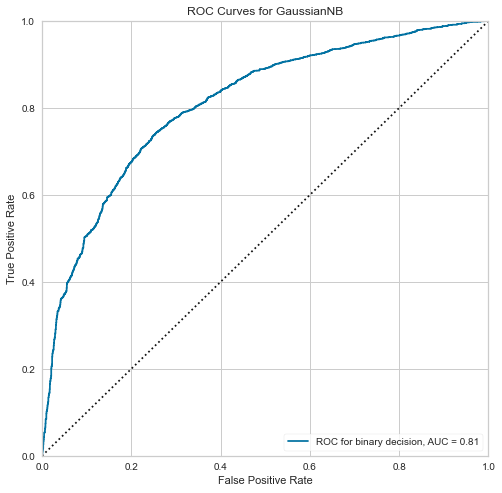

In [19]:
from yellowbrick.classifier.rocauc import roc_auc

plt.figure(figsize=(8,8));
roc_auc(gnbNormal, X_train, y_train, X_test, y_test, binary=True, classes=['No', 'Yes']);

# With one hot encoding

In [20]:
columnas = ['Loc', 'WDir', 'WDir9', 'WDir3']

for columna in columnas:
    aux = pd.get_dummies(Xnum1[columna], prefix=columna)
    Xnum1 = Xnum1.drop(columns = [columna])
    Xnum1 = pd.concat([Xnum1, aux], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnum1, ynum1, test_size=0.2, random_state=0, stratify = y)

              precision    recall  f1-score   support

           0       0.65      0.57      0.61      2251
           1       0.64      0.70      0.67      2384

    accuracy                           0.64      4635
   macro avg       0.64      0.64      0.64      4635
weighted avg       0.64      0.64      0.64      4635



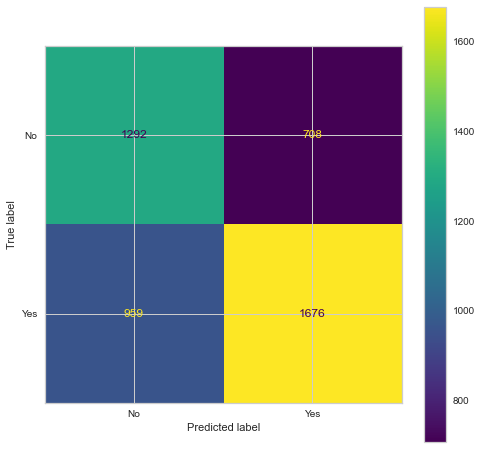

In [22]:
from sklearn.naive_bayes import GaussianNB
gnbNormal = GaussianNB().fit(X_train, y_train)
print(classification_report(gnbNormal.predict(X_test), y_test))

plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(gnbNormal, X_test,y_test, display_labels=['No', 'Yes'], ax=plt.subplot());

# Info

https://www.baeldung.com/cs/naive-bayes-classification-performance